<h3>PYTHON ZOMATO PROJECT</h1> 
<h3>I. DATA COLLECTION</h3>
This project uses open source data from website Kagle.com. 

The data used in the project is about various restaurants from different parts of the world that are on the site zomato.com. Zomato is an online restaraunt search and discovery platform that operates in about 24 countries in the world. 
The data contains Zomato's restaraunts' ratings, restaraunts' locations,  the cuisines offered, the number of votes, delivery options, etc. There are about 9552 rows and 21 coloumns in the data set.

<h3> II. CLEANING & EXPLORATORY DATA ANALYSIS </h3>
In this step, I analyze the data and find the correlation between different variables. There are 26 cols namely Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking, Has Online delivery,Is delivering now,Switch to order menu,Price range,	Aggregate rating,Rating color,Rating text, and Votes.

After analyzing the data, I create scatter plots for analyzing relationship between a country and its rating. I also plot histogram for finding the range of average rating and the number of votes.

<h3>Import the data</h3>

In [10]:
# Import all the packages and read .csv file from desktop
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/vineet.khattar/Downloads/zomato.csv/zomato.csv',encoding = "ISO-8859-1")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


<h3>Create dummy variables from the data</h3> 

In this step I create dummy variables, namely for the following variables:
'Has Online delivery','Has Table booking','Is delivering now',and 'Country Code'

In [11]:
dummy1 = pd.get_dummies(df['Has Online delivery'])
df = pd.concat([df,dummy1],axis =1)
df.rename(columns={'No':'noonlinedelivery'}, inplace=True)
df.rename(columns={'Yes':'yesonlinedelivery'}, inplace=True)


In [12]:
dummy2 = pd.get_dummies(df['Has Table booking'])
df = pd.concat([df,dummy2],axis =1)
df.rename(columns={'No':'Hastable'}, inplace=True)
df.rename(columns={'Yes':'notable'}, inplace=True)


In [13]:
dummy3 = pd.get_dummies(df['Is delivering now'])
df = pd.concat([df,dummy3],axis =1)
df.rename(columns={'No':'yesdelivery'}, inplace=True)
df.rename(columns={'Yes':'nodelivery'}, inplace=True)


In [14]:
dummy5 = pd.get_dummies(df['Country Code'])
df = pd.concat([df,dummy5],axis =1)
df.rename(columns={162:'Botswana'}, inplace=True)
df.rename(columns={30:'Brazil'}, inplace=True)
df.rename(columns={216:'United States'}, inplace=True)
df.rename(columns={14:'Australia'}, inplace=True)
df.rename(columns={37:'Canada'}, inplace=True)
df.rename(columns={215:'United Kingdom'}, inplace=True)
df.rename(columns={214:'UAE'}, inplace=True)
df.rename(columns={208:'Turkey'}, inplace=True)
df.rename(columns={191:'Sri Lanka'}, inplace=True)
df.rename(columns={184:'Singapore'}, inplace=True)
df.rename(columns={189:'South Africa'}, inplace=True)
df.rename(columns={166:'Qatar'}, inplace=True)
df.rename(columns={162:'Philippines'}, inplace=True)
df.rename(columns={14:'India'}, inplace=True)
df.rename(columns={1:'India'}, inplace=True)
df.rename(columns={94:'Indonesia'}, inplace=True)
df.rename(columns={148:'148'}, inplace=True)


In [15]:
dummy6 = pd.get_dummies(df['Has Table booking'])
df = pd.concat([df,dummy6],axis =1)
df.rename(columns={'No':'yesorder'}, inplace=True)
df.rename(columns={'Yes':'noorder'}, inplace=True)


<h3>Data Analysis</h3>

In [16]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,noonlinedelivery,yesonlinedelivery,...,Qatar,Singapore,South Africa,Sri Lanka,Turkey,UAE,United Kingdom,United States,yesorder,noorder
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,...,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748,0.743378,0.256622,...,0.002094,0.002094,0.006282,0.002094,0.003560,0.006282,0.008376,0.045440,0.878756,0.121244
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145,0.436792,0.436792,...,0.045715,0.045715,0.079014,0.045715,0.059561,0.079014,0.091142,0.208279,0.326428,0.326428
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3>Histogram of Aggregated rating </h3>

The histogram shows that majority of the rating is in between 2-5, with the majority between 3-4

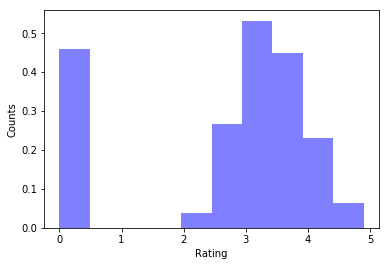

In [17]:
num_bins = 10
plt.hist(df['Aggregate rating'], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.show()


<h3>Histogram of Number of votes</h3>

From the below histogram, we can say that majority of votes are between 0-1000 and few between 1000-2000

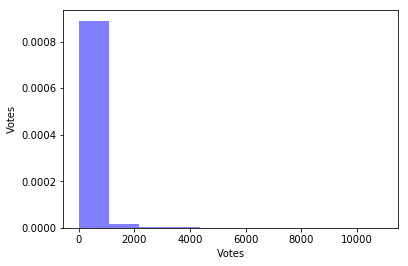

In [18]:
num_bins = 10
plt.hist(df['Votes'], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel("Votes")
plt.ylabel("Votes")

plt.show()


<h3>III. HYPOTHESIS TESTING</h3>

H0: These is no correlation between aggregate rating and number of votes

H1: there is correlation between and number of votes

For exploring the relation, we develop a scatter plot. From the scatterplot, we can say that there is a positive correlation between Aggregate rating and number of votes. We can conclude this logically also, -as greater the number of votes, greater the rating. From the scatterplot, we can see that majority of votes are between 0-2000. Additionally, rating is between 2-5

<h3>SCATTERPLOT</h3>

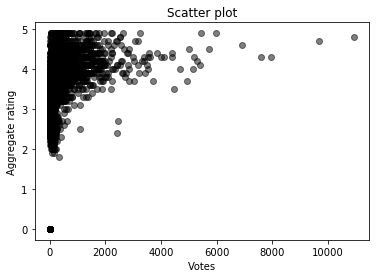

In [32]:
x = df['Votes']
y =df['Aggregate rating']
colors = (0,0,0)
 
# Plot
plt.scatter(x, y,  c=colors, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Votes')
plt.ylabel('Aggregate rating')
plt.show()

<h3 align ='center'>MODEL IMPLEMENTATION</h3>


Using the results from the above scatterplot, I explore further relationship between rating and other variables in the model. For that I develop Linear regresssion model. I further develop 2 more models namely Logistic regression and KNN Classification.


<h3>LINEAR REGRESSION</h3>

Using linear regression, I find the predicted values of aggregated rating. My R2 is 32%, this means that I can find aggregated rating with an accuracy of 32 %. 
The Mean Squared error is 0.68. The error was reduced after data is scaled.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

X = df[['Average Cost for two','yesonlinedelivery','Votes','yesdelivery','Hastable','yesorder','Price range', 'India','Australia','Brazil','Canada','Indonesia','Botswana','Qatar','Singapore','UAE','United Kingdom','United States']]
y = df[['Aggregate rating']]
X = scale(X)
y = scale(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=31)
reg_all = LinearRegression()

reg_all.fit(X_train, y_train)
# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print("R^2: {}".format(reg_all.score(X_test, y_test)))



0.689053456925
0.68991745471
R^2: 0.32380500284983926


<h2>KNN CLASSIFICATION</h2>

To get a better accuracy of than linear regression, I perform KNN classification. In KNN classification, I classify data according to the rating labels (such as Excellent, Average, Good, Very good ). The classification report shows that the accuracy of the data is as 71%. Thus, this data is better suited for KNN classification than linear regression.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize call to ML Algorithm of choice
knn = KNeighborsClassifier(n_neighbors = 6)
X = df[['Average Cost for two','Votes','Price range','Aggregate rating','Longitude','Latitude']]
y = df[['Rating text']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=31)

# Fit the data
knn = knn.fit(X_train, y_train)

# Predict on the data
y_prediction = knn.predict(X_test)

# Classification Report of predictions
print(classification_report(y_test, y_prediction))
print(knn.score(X_test, y_test))


             precision    recall  f1-score   support

    Average       0.74      0.87      0.80      1112
  Excellent       0.38      0.21      0.27       104
       Good       0.48      0.49      0.49       601
  Not rated       1.00      0.98      0.99       659
       Poor       0.00      0.00      0.00        50
  Very Good       0.46      0.31      0.37       340

avg / total       0.69      0.71      0.69      2866

0.712491277041


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


<h2>LOGISTIC REGRESSSION</h2>


To further increase the accuracy, I perform the logistic regression model. The accuracy of the logistic regression is 97%. 
Thus, this model is best suited for this data. For the logistic regression,I check how much data is in the excellent category.

In [28]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
dummy8 = pd.get_dummies(df['Rating text'])
df = pd.concat([df,dummy8],axis =1)



In [57]:

X = df[['Average Cost for two','Votes','Price range','Aggregate rating']]
y = df[['Excellent']]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)


# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[3703    3]
 [ 110    5]]
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3706
          1       0.62      0.04      0.08       115

avg / total       0.96      0.97      0.96      3821



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the above logistic regression model is 97%. Thus, this model is best suited for logistic regression.